In [113]:
import numpy as np

n = 8
b = np.exp((-2 * np.pi * (0+1j)) / n)
F = np.zeros((n, n), dtype=np.complex)
for x, y in ((x, y) for x in range(n) for y in range(n)):
    F[x][y] = b ** (x * y)

In [114]:
F

array([[ 1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j],
       [ 1.00000000e+00+0.00000000e+00j,  7.07106781e-01-7.07106781e-01j,
         2.22044605e-16-1.00000000e+00j, -7.07106781e-01-7.07106781e-01j,
        -1.00000000e+00-4.44089210e-16j, -7.07106781e-01+7.07106781e-01j,
        -6.66133815e-16+1.00000000e+00j,  7.07106781e-01+7.07106781e-01j],
       [ 1.00000000e+00+0.00000000e+00j,  2.22044605e-16-1.00000000e+00j,
        -1.00000000e+00-4.44089210e-16j, -6.66133815e-16+1.00000000e+00j,
         1.00000000e+00+8.88178420e-16j,  1.11022302e-15-1.00000000e+00j,
        -1.00000000e+00-1.33226763e-15j, -1.55431223e-15+1.00000000e+00j],
       [ 1.00000000e+00+0.00000000e+00j, -7.07106781e-01-7.07106781e-01j,
        -6.66133815e-16+1.00000000e

In [115]:
a = np.random.rand(n)
A = a @ F
print(np.fft.fft(a))
print(A)

[ 3.46552735+0.j          0.05902751+0.62939069j  0.08858646-0.19753234j
 -0.01204321-0.25644779j  2.3247327 +0.j         -0.01204321+0.25644779j
  0.08858646+0.19753234j  0.05902751-0.62939069j]
[ 3.46552735+0.00000000e+00j  0.05902751+6.29390686e-01j
  0.08858646-1.97532344e-01j -0.01204321-2.56447786e-01j
  2.3247327 +3.03054467e-15j -0.01204321+2.56447786e-01j
  0.08858646+1.97532344e-01j  0.05902751-6.29390686e-01j]


In [116]:
Fr = np.linalg.inv(F)
a2 = A @ Fr
a2

np.allclose(a, a2)
np.allclose(a2, np.fft.ifft(A))

True

In [141]:
def cooley_tukey(N):
    if len(N) == 1:
        return N
    b = np.exp((-2 * np.pi * (0+1j)) / len(N))
    even = [x for i, x in enumerate(N) if i % 2 == 0]
    odd = [x for i, x in enumerate(N) if i % 2 == 1]
    dft_even = cooley_tukey(even)
    dft_odd = cooley_tukey(odd)
    
    result = np.zeros(len(N), dtype=np.complex)
    for i in range(len(N) // 2):
        result[i] = dft_even[i] + (b ** i) * dft_odd[i]
        result[i + (len(N) // 2)] = dft_even[i] - (b ** i) * dft_odd[i]
        
    return result

len(a)

8

In [142]:
np.fft.fft(a)

array([ 3.46552735+0.j        ,  0.05902751+0.62939069j,
        0.08858646-0.19753234j, -0.01204321-0.25644779j,
        2.3247327 +0.j        , -0.01204321+0.25644779j,
        0.08858646+0.19753234j,  0.05902751-0.62939069j])

In [143]:
cooley_tukey(a)

array([ 3.46552735+0.j        ,  0.05902751+0.62939069j,
        0.08858646-0.19753234j, -0.01204321-0.25644779j,
        2.3247327 +0.j        , -0.01204321+0.25644779j,
        0.08858646+0.19753234j,  0.05902751-0.62939069j])

In [203]:
sizes = [2**4, 2**8, 2**10, 2**12, 2**14, 2**16]
for s in sizes:
    print("=== size {} ===".format(s))
    data = np.random.rand(s)
    
    print("traditional:")
    b = np.exp((-2 * np.pi * (0+1j)) / s)
    F = np.zeros((s, s), dtype=np.complex)
    for x, y in ((x, y) for x in range(s) for y in range(s)):
        F[x][y] = b ** (x * y)
    %time data @ F
    
    print("my fft:")
    %time cooley_tukey(data)
    
    print("NumPy fft:")
    %time np.fft.fft(data)
    
    print()
    

=== size 16 ===
traditional:
CPU times: user 18 µs, sys: 3 µs, total: 21 µs
Wall time: 26 µs
my fft:
CPU times: user 349 µs, sys: 124 µs, total: 473 µs
Wall time: 385 µs
NumPy fft:
CPU times: user 534 µs, sys: 323 µs, total: 857 µs
Wall time: 575 µs

=== size 256 ===
traditional:
CPU times: user 498 µs, sys: 134 µs, total: 632 µs
Wall time: 304 µs
my fft:
CPU times: user 9.31 ms, sys: 896 µs, total: 10.2 ms
Wall time: 5.21 ms
NumPy fft:
CPU times: user 186 µs, sys: 73 µs, total: 259 µs
Wall time: 138 µs

=== size 1024 ===
traditional:


KeyboardInterrupt: 

In [204]:
frequencies = [1, 2, 3, 4, 5]
signal_a = [sum(np.sin((t / 10000) * 2 * np.pi * f) for f in frequencies) for t in range(100000)]
signal_b = [np.sin((t / 10000) * 2 * np.pi * frequencies[t // 20000]) for t in range(100000)]

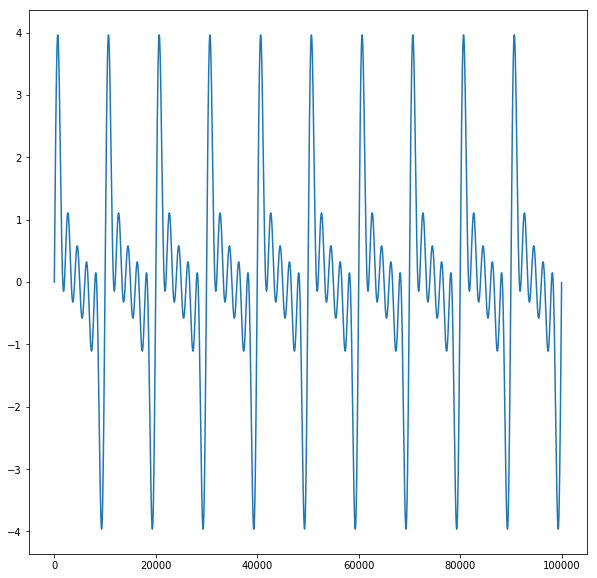

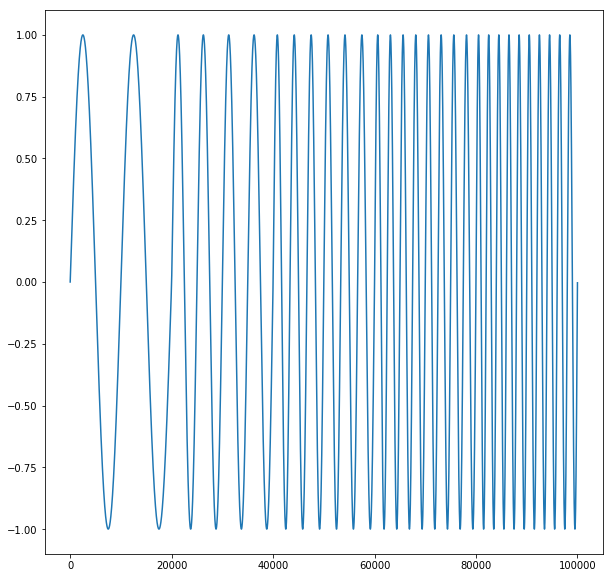

In [205]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(signal_a)
plt.show()
plt.figure(figsize=(10,10))
plt.plot(signal_b)
plt.show()

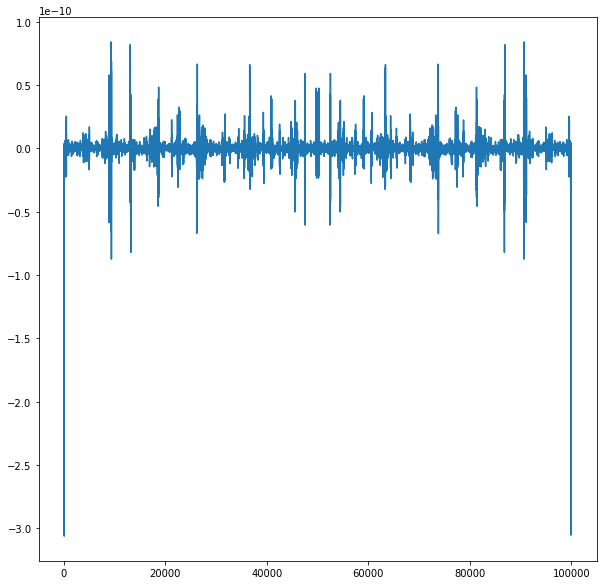

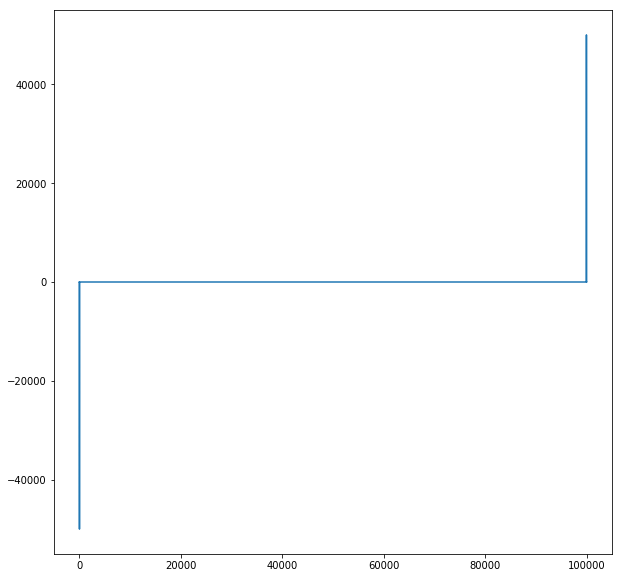

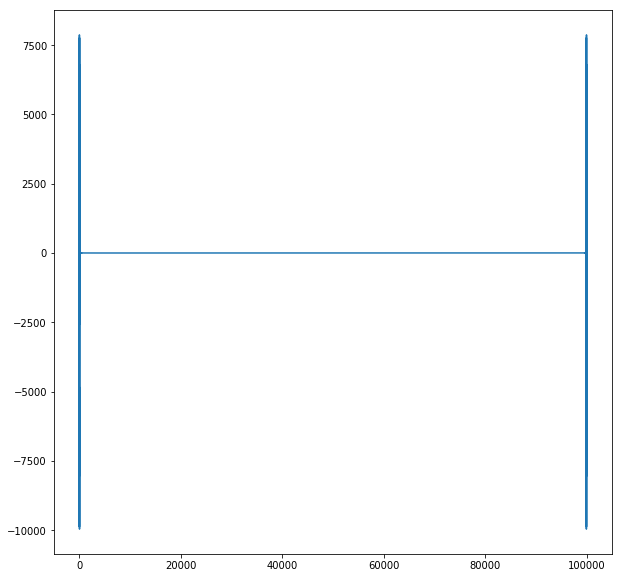

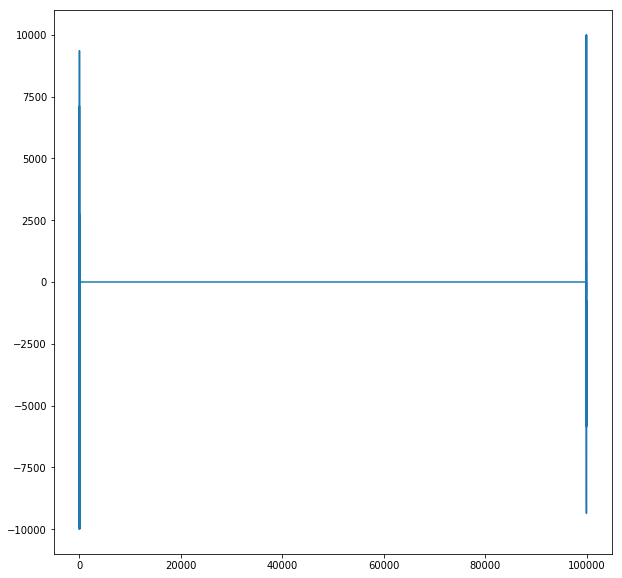

In [206]:
freq_a = np.fft.fft(signal_a)
freq_b = np.fft.fft(signal_b)
plt.figure(figsize=(10,10))
plt.plot(np.real(freq_a))
plt.show()
plt.figure(figsize=(10,10))
plt.plot(np.imag(freq_a))
plt.show()
plt.figure(figsize=(10,10))
plt.plot(np.real(freq_b))
plt.show()
plt.figure(figsize=(10,10))
plt.plot(np.imag(freq_b))
plt.show()